[*********************100%***********************]  10 of 10 completed


Daily returns data saved to DailyStockReturns.csv


<ipython-input-13-ca94d3bf9acb>:90: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


Visual report saved to DailyStockReturnReport.pdf


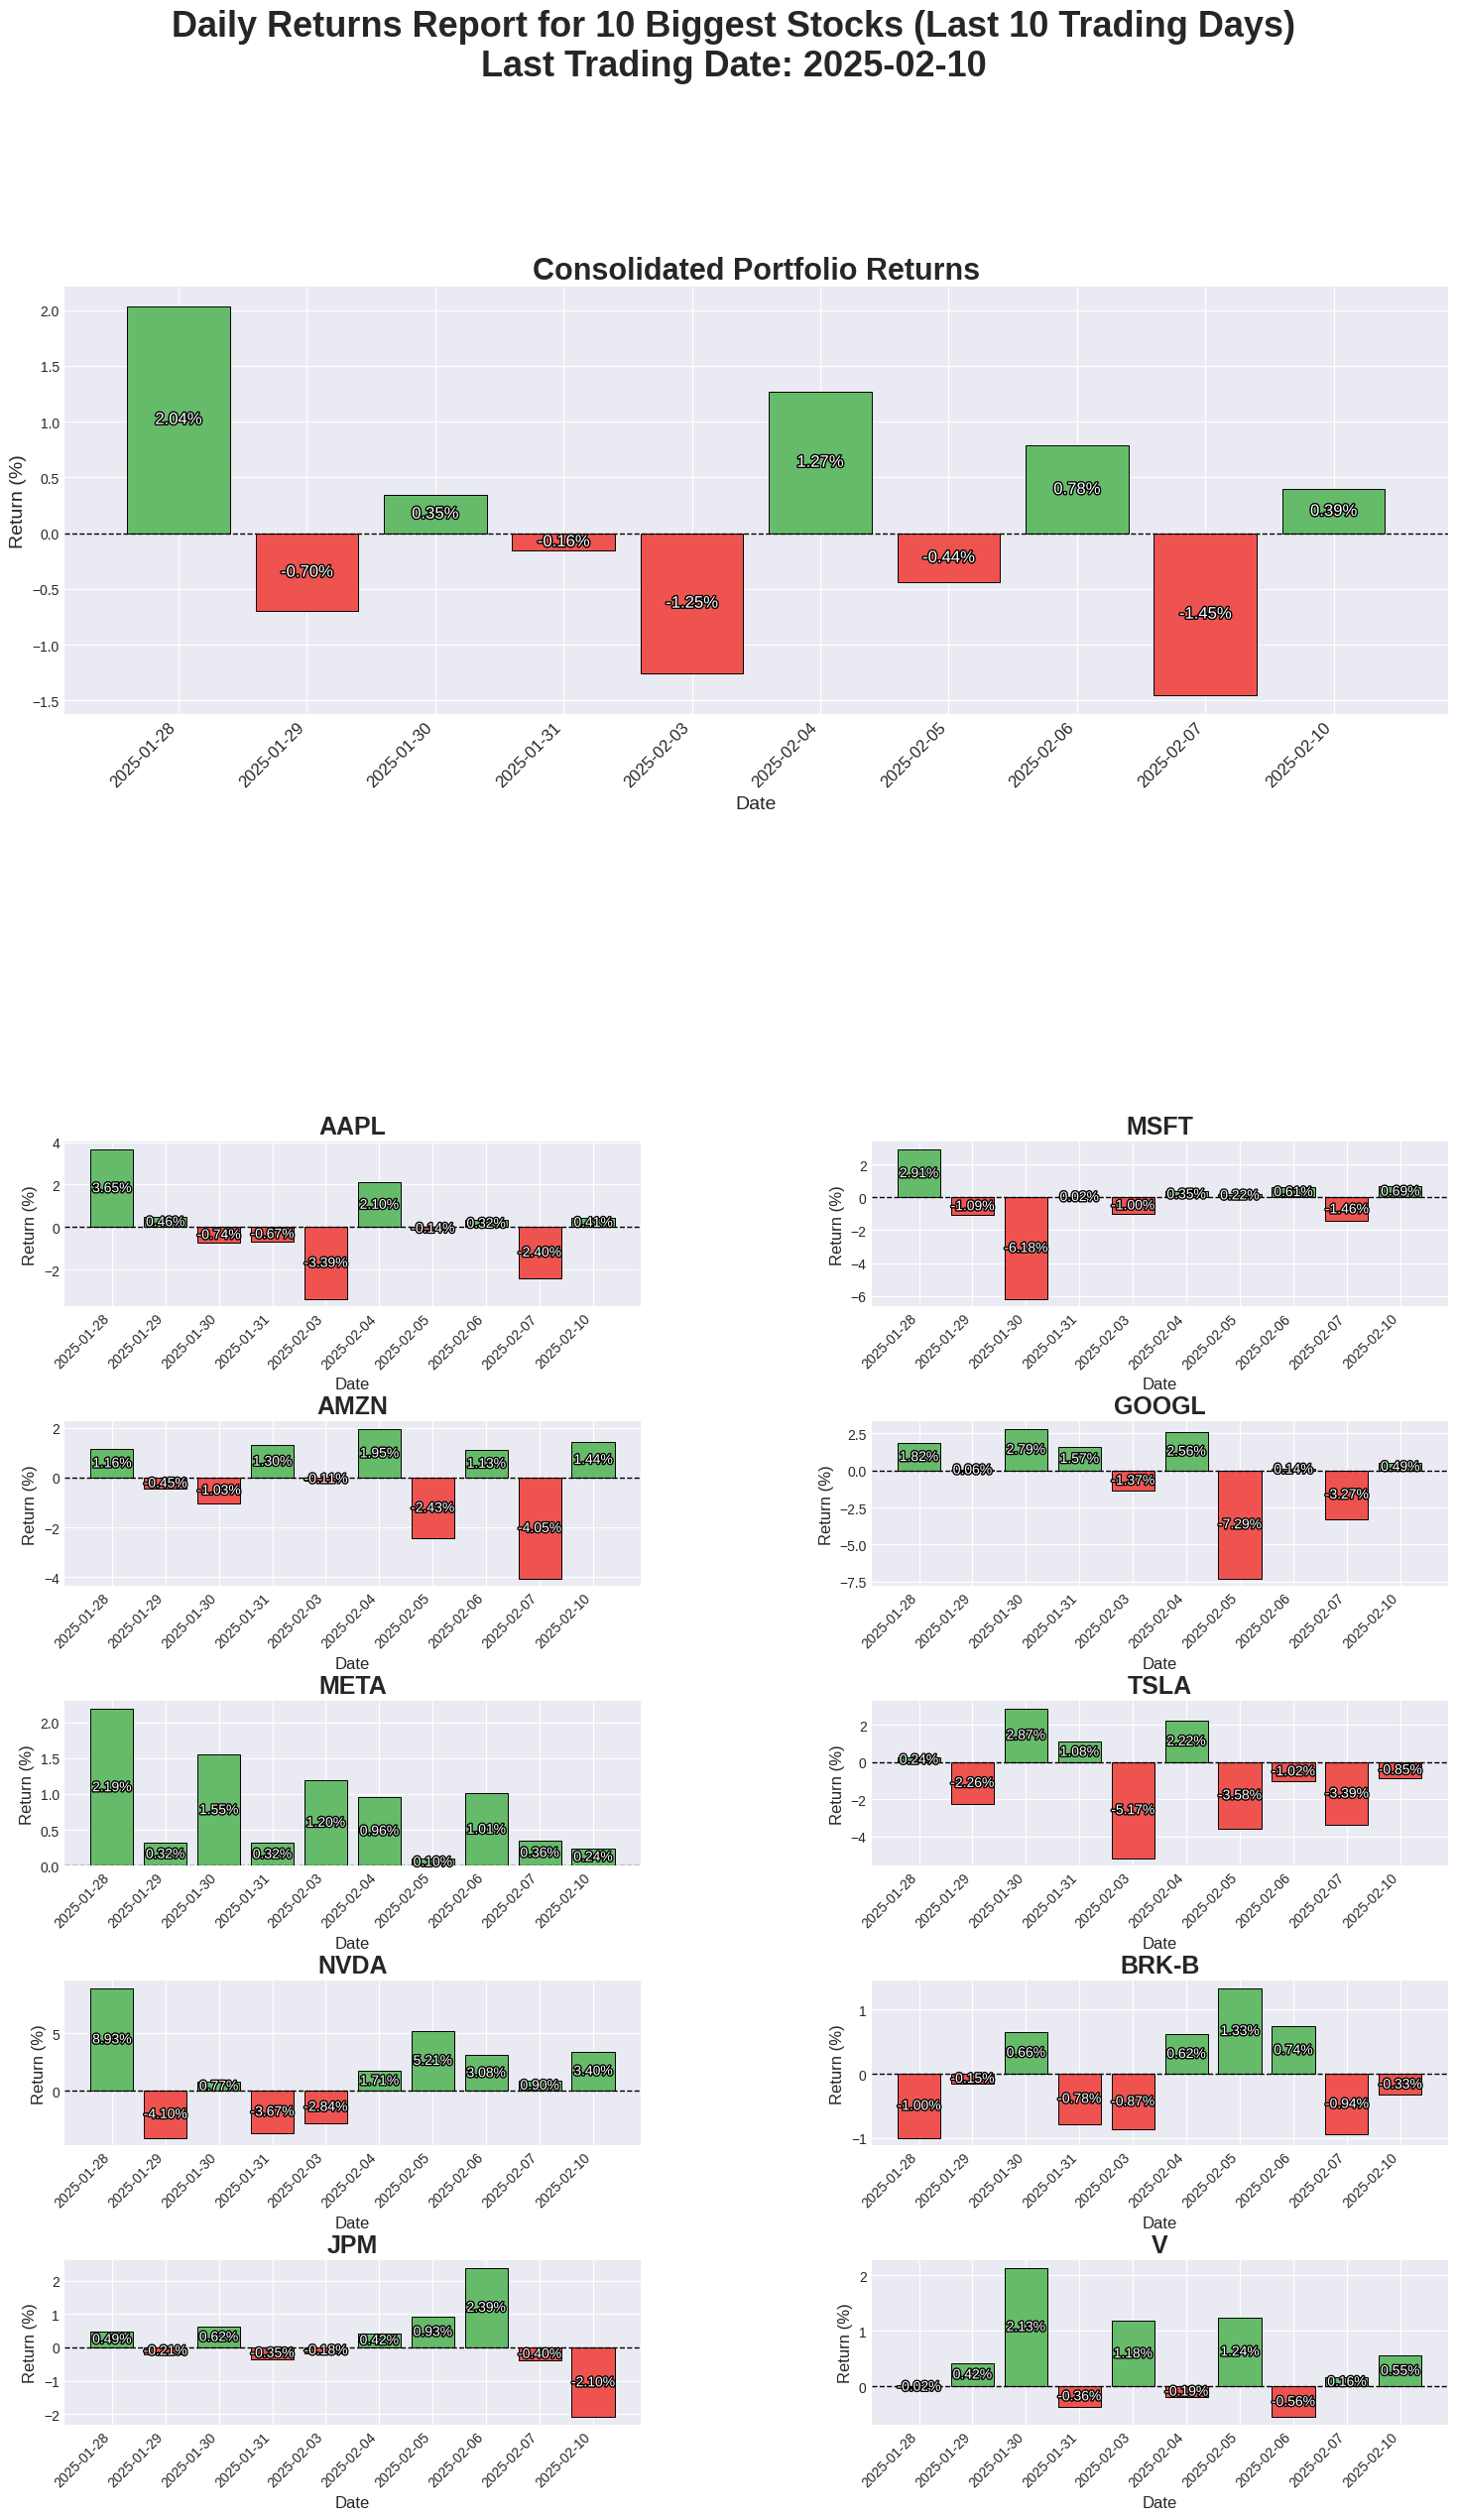

In [13]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.gridspec as gridspec
import matplotlib.patheffects as PathEffects

# Use a modern, clean style from matplotlib
plt.style.use('seaborn-v0_8-darkgrid')

# Define tickers for the 10 biggest stocks (by market cap)
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META', 'TSLA', 'NVDA', 'BRK-B', 'JPM', 'V']

# Get today's date
today = datetime.date.today()

# Download data for a window that likely includes at least 11 trading days.
# Using a period of 15 days to ensure we capture enough data (accounting for weekends/holidays)
data = yf.download(tickers, period="15d", interval="1d")['Close']

# Use only the most recent 11 rows (to compute 10 days of returns)
data = data.tail(11)

# Compute daily returns (percentage change) and drop the first row (NaN)
daily_returns = data.pct_change().dropna() * 100

# Save the daily returns as a CSV file
csv_filename = "DailyStockReturns.csv"
daily_returns.to_csv(csv_filename, index=True)
print(f"Daily returns data saved to {csv_filename}")

# Compute consolidated (portfolio) returns assuming equal allocation across stocks.
# This is the average of the individual daily returns.
portfolio_returns = daily_returns.mean(axis=1)

# Create a figure with two grids:
# - The top grid (row) for the consolidated return graph.
# - The bottom grid for the individual stock charts.
fig = plt.figure(figsize=(18, 28))
outer_gs = gridspec.GridSpec(2, 1, height_ratios=[1, 3], hspace=0.5)

# --- Consolidated Returns Graph ---
ax_cons = fig.add_subplot(outer_gs[0])
cons_positions = range(len(portfolio_returns))
cons_x_labels = [d.strftime("%Y-%m-%d") for d in portfolio_returns.index]
cons_colors = ['#66bb6a' if val >= 0 else '#ef5350' for val in portfolio_returns.values]

ax_cons.bar(cons_positions, portfolio_returns.values, color=cons_colors, edgecolor='black', linewidth=0.7)
ax_cons.axhline(0, color='black', linewidth=1, linestyle='--')
ax_cons.set_title("Consolidated Portfolio Returns", fontsize=22, weight='bold')
ax_cons.set_xlabel("Date", fontsize=14)
ax_cons.set_ylabel("Return (%)", fontsize=14)
ax_cons.set_xticks(cons_positions)
ax_cons.set_xticklabels(cons_x_labels, rotation=45, ha='right', fontsize=12)
# Place annotations inside each bar (two decimals)
for pos, value in zip(cons_positions, portfolio_returns.values):
    txt = ax_cons.text(pos, value/2, f"{value:.2f}%", ha='center', va='center', fontsize=12, color='white')
    txt.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='black')])

# --- Individual Stock Charts ---
# Create an inner grid for 10 subplots (5 rows x 2 columns) within the bottom half.
inner_gs = gridspec.GridSpecFromSubplotSpec(5, 2, subplot_spec=outer_gs[1], hspace=0.7, wspace=0.4)

for i, ticker in enumerate(tickers):
    ax = fig.add_subplot(inner_gs[i])
    series = daily_returns[ticker]
    positions = range(len(series))
    x_labels = [d.strftime("%Y-%m-%d") for d in series.index]
    colors = ['#66bb6a' if val >= 0 else '#ef5350' for val in series.values]

    ax.bar(positions, series.values, color=colors, edgecolor='black', linewidth=0.7)
    ax.axhline(0, color='black', linewidth=1, linestyle='--')
    ax.set_title(ticker, fontsize=18, weight='semibold')
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Return (%)", fontsize=12)
    ax.set_xticks(positions)
    ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=10)

    # Place annotations inside each bar (two decimals)
    for pos, value in zip(positions, series.values):
        txt = ax.text(pos, value/2, f"{value:.2f}%", ha='center', va='center', fontsize=10, color='white')
        txt.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='black')])

# Set a super title for the full report including the last trading date.
fig.suptitle(
    f"Daily Returns Report for 10 Biggest Stocks (Last 10 Trading Days)\nLast Trading Date: {daily_returns.index[-1].strftime('%Y-%m-%d')}",
    fontsize=26, weight='bold'
)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the full report as a PDF file
pdf_filename = "DailyStockReturnReport.pdf"
plt.savefig(pdf_filename, format="pdf")
print(f"Visual report saved to {pdf_filename}")

plt.show()
